# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
from citipy import citipy
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from pprint import pprint
import random
import numpy as np


In [2]:
latitudes = [random.randint(-90,90) for iter in range(50)]
longitudes = [random.randint(-180,180) for iter in range(50)]

## Generate Cities List

In [3]:
#Find the number of possible cities
num_cities = len(latitudes)*len(longitudes)
num_cities

2500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_list = []


print(f"Beginning Data Retrieval")
print(f"------------------------")

for lat in latitudes:
    for long in longitudes:
        city = citipy.nearest_city(lat,long)
        print(city.city_name)
        city_list.append(city.city_name)
        
        

Beginning Data Retrieval
------------------------
hobart
bluff
ushuaia
rikitea
new norfolk
cape town
bluff
port alfred
hermanus
ushuaia
port alfred
albany
busselton
ushuaia
cape town
vaini
hobart
east london
albany
ushuaia
new norfolk
vaini
vaini
rikitea
ushuaia
port alfred
busselton
albany
busselton
busselton
port alfred
cape town
ushuaia
vaini
punta arenas
saint-philippe
bredasdorp
mataura
rikitea
hobart
hermanus
mataura
ushuaia
cape town
east london
mataura
port alfred
taolanaro
busselton
mataura
kokopo
kokopo
codo
atuona
nabire
axim
lolua
mungaa
tshela
campo maior
mlalo
galesong
meulaboh
teresina
tabou
vaitupu
madang
kismayo
teluknaga
manicore
tual
saleaula
saleaula
atuona
borba
mungaa
hithadhoo
galesong
hithadhoo
meulaboh
micheweni
georgetown
natal
vaitupu
talara
hithadhoo
lusambo
faanui
atuona
madang
gamba
faanui
novo aripuana
axim
victoria
faanui
bur gabo
victoria
padang
atuona
hobart
hobart
mar del plata
rikitea
new norfolk
cape town
kaitangata
port alfred
hermanus
mar del plat

jamestown
vaitupu
kainantu
mutsamudu
bekasi
manicore
tual
saleaula
saleaula
atuona
jacareacanga
kilimatinde
hithadhoo
galesong
hithadhoo
meulaboh
chake chake
georgetown
cabedelo
vaitupu
talara
hithadhoo
dibaya
faanui
atuona
lae
mayumba
faanui
manicore
jamestown
victoria
faanui
mitsamiouli
victoria
padang
atuona
batemans bay
ulladulla
cidreira
rikitea
port lincoln
luderitz
okato
umzimvubu
cape town
cidreira
margate
albany
busselton
cidreira
jamestown
vaini
warragul
tsihombe
busselton
bahia blanca
port lincoln
vaini
vaini
rikitea
necochea
umzimvubu
bambous virieux
albany
bambous virieux
busselton
tsihombe
jamestown
arraial do cabo
vaini
lebu
mahebourg
knysna
avarua
rikitea
sale
saldanha
avarua
tres arroyos
luderitz
taolanaro
mataura
tsihombe
saint-philippe
busselton
mataura
hasaki
hasaki
ribeira grande
pacific grove
shingu
adrar
severo-kurilsk
elat
mizdah
ribeira grande
sakakah
anqing
mangan
ribeira grande
mrirt
kapaa
katsuura
abadan
fuling
saint george
kushima
kapaa
kapaa
half moon bay


shakiso
keningau
kalmunai
carutapera
abidjan
vaitupu
lorengau
hobyo
paka
boa vista
kloulklubed
saleaula
saleaula
atuona
ituni
kapoeta
matara
keningau
galle
banda aceh
mandera
harper
jardim
vaitupu
burica
male
bangassou
hilo
atuona
lorengau
port harcourt
hilo
lethem
adiake
hobyo
hilo
mahadday weyne
ugoofaaru
banda aceh
atuona
chokurdakh
chokurdakh
ilulissat
tuktoyaktuk
nizhneyansk
klaksvik
pevek
skalistyy
barentsburg
tasiilaq
tumannyy
saskylakh
talnakh
ilulissat
klaksvik
mys shmidta
chokurdakh
belushya guba
khatanga
upernavik
tiksi
lavrentiya
mys shmidta
tuktoyaktuk
upernavik
skalistyy
dikson
saskylakh
dikson
talnakh
ostrovnoy
klaksvik
tasiilaq
mys shmidta
qaanaaq
dikson
havoysund
barrow
tuktoyaktuk
chokurdakh
barentsburg
barrow
upernavik
klaksvik
belushya guba
barrow
belushya guba
amderma
khatanga
aklavik
hasaki
hasaki
codrington
lompoc
naze
adrar
butaritari
safaga
awbari
ribeira grande
umm lajj
yongan
kishanganj
ribeira grande
taoudenni
kapaa
katsuura
buqayq
xiaoweizhai
hamilton
naze


In [5]:
city_list = set(city_list)
len(city_list)

621

In [7]:
cities = city_list
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = "INSERT YOUR KEY HERE"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
i = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    i =+ 1
    try:
        current_city = response["name"]
        print(f"Processing {i} iteration for {current_city}")
        City.append(response["name"])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
    except KeyError:
        pass

Processing 1 iteration for Adwa
Processing 1 iteration for Naze
Processing 1 iteration for Moratuwa
Processing 1 iteration for Sydney
Processing 1 iteration for Hobart
Processing 1 iteration for Yining
Processing 1 iteration for Half Moon Bay
Processing 1 iteration for Beloha
Processing 1 iteration for Edd
Processing 1 iteration for Philadelphia
Processing 1 iteration for Cumbernauld
Processing 1 iteration for Panguna
Processing 1 iteration for Nnewi
Processing 1 iteration for Nyurba
Processing 1 iteration for Cabedelo
Processing 1 iteration for Rocha
Processing 1 iteration for Severodvinsk
Processing 1 iteration for Port Hawkesbury
Processing 1 iteration for Vung Tau
Processing 1 iteration for Cockenzie
Processing 1 iteration for Bahía Blanca
Processing 1 iteration for Chake Chake
Processing 1 iteration for Singaparna
Processing 1 iteration for Mugumu
Processing 1 iteration for Fuling
Processing 1 iteration for Boa Vista
Processing 1 iteration for Avarua
Processing 1 iteration for Sev

Processing 1 iteration for Vila Velha
Processing 1 iteration for Anking
Processing 1 iteration for Dalmau
Processing 1 iteration for Leverkusen
Processing 1 iteration for Port Moresby
Processing 1 iteration for Minna
Processing 1 iteration for Itacoatiara
Processing 1 iteration for Banda Aceh
Processing 1 iteration for Mbekenyera
Processing 1 iteration for Maxixe
Processing 1 iteration for Zvenigovo
Processing 1 iteration for Havøysund
Processing 1 iteration for Bandi̇̄pur
Processing 1 iteration for Muzhi
Processing 1 iteration for Niterói
Processing 1 iteration for Ouadda
Processing 1 iteration for Lokoja
Processing 1 iteration for Namatanai
Processing 1 iteration for Clyde River
Processing 1 iteration for Berbera
Processing 1 iteration for Buraidah
Processing 1 iteration for Touros
Processing 1 iteration for Batié
Processing 1 iteration for Pemangkat
Processing 1 iteration for Rio Claro
Processing 1 iteration for Mittweida
Processing 1 iteration for Guerrero Negro
Processing 1 iterat

Processing 1 iteration for Upernavik
Processing 1 iteration for Sumbe
Processing 1 iteration for Sørland
Processing 1 iteration for Tengzhou
Processing 1 iteration for Irecê
Processing 1 iteration for Kloulklubed
Processing 1 iteration for Hvide Sande
Processing 1 iteration for Adrar
Processing 1 iteration for Ilulissat
Processing 1 iteration for Westport
Processing 1 iteration for Upata
Processing 1 iteration for Porto-Novo
Processing 1 iteration for Khatanga
Processing 1 iteration for Mitsamiouli
Processing 1 iteration for Scottsboro
Processing 1 iteration for St. Pete Beach
Processing 1 iteration for Campo Maior
Processing 1 iteration for Sopela
Processing 1 iteration for Kitale
Processing 1 iteration for Ketchikan
Processing 1 iteration for Pāveh
Processing 1 iteration for Leshukonskoye
Processing 1 iteration for Galesong
Processing 1 iteration for Ostrovnoy
Processing 1 iteration for Samarai
Processing 1 iteration for Bredasdorp
Processing 1 iteration for Saint-Philippe
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_dict = {
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date
}

cities_data = pd.DataFrame(cities_dict)
cities_data.to_csv("../output_data/cities_data.csv")
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adwa,14.16,38.90,14.17,47,0,1.24,ET,1604097144
1,Naze,28.37,129.48,23.00,60,40,9.30,JP,1604097144
2,Moratuwa,6.77,79.88,27.00,88,40,1.00,LK,1604097145
3,Sydney,-33.87,151.21,19.44,88,75,6.70,AU,1604097238
4,Hobart,-42.88,147.33,15.56,76,20,2.60,AU,1604096879
...,...,...,...,...,...,...,...,...,...
553,Mandalgovi,45.76,106.27,-4.52,80,2,4.92,MN,1604097694
554,Kitui,-1.37,38.01,16.39,96,67,1.99,KE,1604097695
555,Lebu,-37.62,-73.65,12.17,82,0,5.60,CL,1604097696
556,Antigonish,45.62,-62.00,3.33,64,100,1.79,CA,1604097696


In [9]:
cities_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,16.622688,27.865197,15.608387,75.750896,55.096774,3.166505,1.604097e+09
std,31.795155,79.084015,11.855944,19.125137,38.774836,2.392932,1.995520e+02
min,-54.800000,-179.170000,-23.120000,7.000000,0.000000,0.110000,1.604097e+09
25%,-5.112500,-35.445000,8.192500,67.000000,19.000000,1.472500,1.604097e+09
50%,9.360000,34.965000,18.945000,81.000000,66.500000,2.600000,1.604098e+09
75%,43.797500,87.952500,25.307500,91.000000,91.000000,4.252500,1.604098e+09
max,78.220000,173.880000,33.000000,100.000000,100.000000,15.400000,1.604098e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
indexes_100 = list(np.where(cities_data["Humidity"] > 100))
indexes_100

[array([], dtype=int64)]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

We can see that Max Temperature has higher values when we get closer to the Equator (the 0th degree in Latitude)

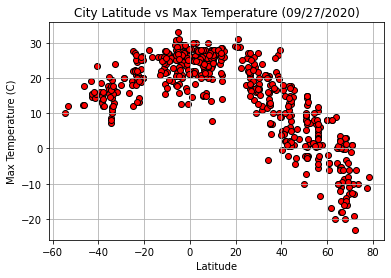

In [11]:
plt.scatter(cities_data["Lat"], cities_data["Max Temp"], facecolors = "red", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (09/27/2020)")
plt.savefig("../output_data/lat_vs_max_temp.png")

## Latitude vs. Humidity Plot

There seems to be little correlation between humidity and latitude as shown in the plot bellow. One can say that humidity is more correlated to proximity to large bodies of water than latitude itself.

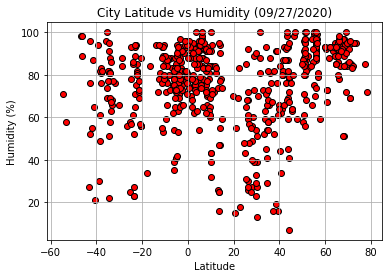

In [12]:
plt.scatter(cities_data["Lat"], cities_data["Humidity"], facecolors = "red", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (09/27/2020)")
plt.savefig("../output_data/lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

Cloudiness also seems to have no correlation with the city's latitude with the graph being scattered all around.

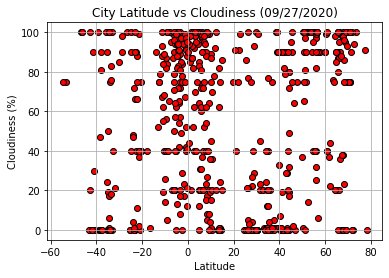

In [13]:
plt.scatter(cities_data["Lat"], cities_data["Cloudiness"], facecolors = "red", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (09/27/2020)")
plt.savefig("../output_data/lat_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

Wind speed also doesn't seem to vary greatly with Latitude as shown in the graph below.

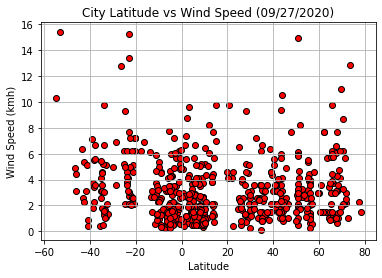

In [14]:
plt.scatter(cities_data["Lat"], cities_data["Wind Speed"], facecolors = "red", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmh)")
plt.title("City Latitude vs Wind Speed (09/27/2020)")
plt.savefig("../output_data/lat_vs_wind_speed.png")

## Linear Regression

In [15]:
north_cities = cities_data[cities_data["Lat"]>=0]
south_cities = cities_data[cities_data["Lat"]<0]

There seems to be a great correlation between Max Temperatures and Latitudes as displayed in the plot above. Bellow we can see that from the 0th Latitude, a linear trend is displayed and fits well within our data. With R values above 0.5, this seems to be a good display of correlation.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8779635706589992


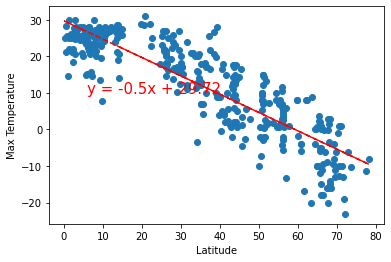

In [16]:
nml_slope, nml_int, nml_r, nml_p, nml_std_err = stats.linregress(north_cities["Lat"], north_cities["Max Temp"])
nml_fit = nml_slope * north_cities["Lat"] + nml_int
plt.scatter(north_cities["Lat"],north_cities["Max Temp"])
plt.plot(north_cities["Lat"],nml_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {nml_r}")
line_eq = "y = " + str(round(nml_slope,2)) + "x + " + str(round(nml_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.71477381005036


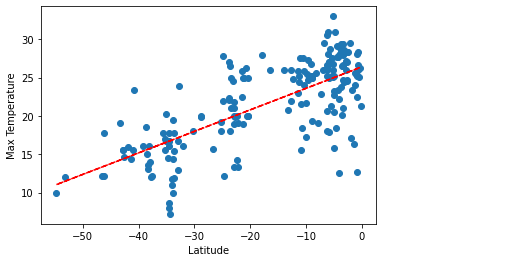

In [17]:
sml_slope, sml_int, sml_r, sml_p, sml_std_err = stats.linregress(south_cities["Lat"], south_cities["Max Temp"])
sml_fit = sml_slope * south_cities["Lat"] + sml_int
plt.scatter(south_cities["Lat"],south_cities["Max Temp"])
plt.plot(south_cities["Lat"],sml_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {sml_r}")
line_eq = "y = " + str(round(sml_slope,2)) + "x + " + str(round(sml_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

As shown in the scatter plots below, the correlation between humidity and latitude is very weak with a R value of as little as 0.16.

The r-value is: 0.1809571491018812


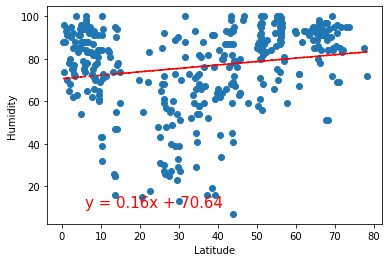

In [18]:
nhl_slope, nhl_int, nhl_r, nhl_p, nhl_std_err = stats.linregress(north_cities["Lat"], north_cities["Humidity"])
nhl_fit = nhl_slope * north_cities["Lat"] + nhl_int
plt.scatter(north_cities["Lat"],north_cities["Humidity"])
plt.plot(north_cities["Lat"],nhl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {nhl_r}")
line_eq = "y = " + str(round(nhl_slope,2)) + "x + " + str(round(nhl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18442387854987202


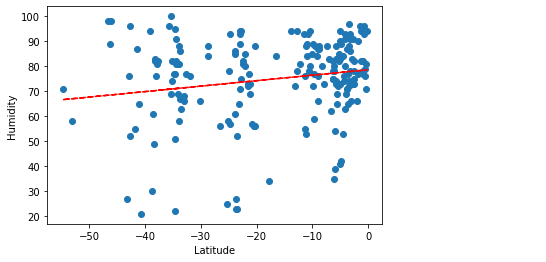

In [19]:
shl_slope, shl_int, shl_r, shl_p, shl_std_err = stats.linregress(south_cities["Lat"], south_cities["Humidity"])
shl_fit = shl_slope * south_cities["Lat"] + shl_int
plt.scatter(south_cities["Lat"],south_cities["Humidity"])
plt.plot(south_cities["Lat"],shl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {shl_r}")
line_eq = "y = " + str(round(shl_slope,2)) + "x + " + str(round(shl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

As shown above for humidity, cloudiness doesnt seem to have a well defined correlation with latitude either. The largest R value received was 0.19 on the Northen Hemisphere.

The r-value is: 0.14397611673536498


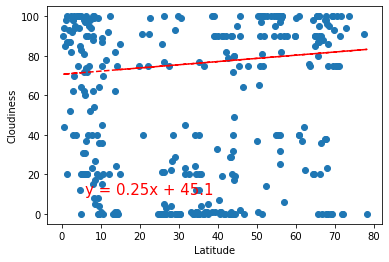

In [20]:
ncl_slope, ncl_int, ncl_r, ncl_p, ncl_std_err = stats.linregress(north_cities["Lat"], north_cities["Cloudiness"])
ncl_fit = ncl_slope * north_cities["Lat"] + ncl_int
plt.scatter(north_cities["Lat"],north_cities["Cloudiness"])
plt.plot(north_cities["Lat"],nhl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {ncl_r}")
line_eq = "y = " + str(round(ncl_slope,2)) + "x + " + str(round(ncl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2570152547214914


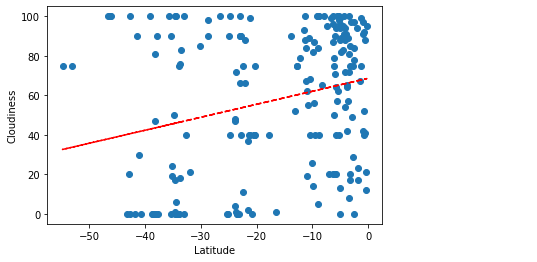

In [21]:
scl_slope, scl_int, scl_r, scl_p, scl_std_err = stats.linregress(south_cities["Lat"], south_cities["Cloudiness"])
scl_fit = scl_slope * south_cities["Lat"] + scl_int
plt.scatter(south_cities["Lat"],south_cities["Cloudiness"])
plt.plot(south_cities["Lat"],scl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {scl_r}")
line_eq = "y = " + str(round(scl_slope,2)) + "x + " + str(round(scl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Wind speed as well shows little sign of correlation with latitude. Despite having opposite R values for the northern and southern hemisphere which could be a good sign, the highest R value achieved was 0.23 which doesn't allow us to define a correlation.

The r-value is: 0.13504880606048442


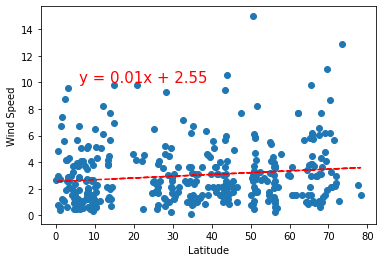

In [22]:
nwl_slope, nwl_int, nwl_r, nwl_p, nwl_std_err = stats.linregress(north_cities["Lat"], north_cities["Wind Speed"])
nwl_fit = nwl_slope * north_cities["Lat"] + nwl_int
plt.scatter(north_cities["Lat"],north_cities["Wind Speed"])
plt.plot(north_cities["Lat"],nwl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {nwl_r}")
line_eq = "y = " + str(round(nwl_slope,2)) + "x + " + str(round(nwl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3181058496087737


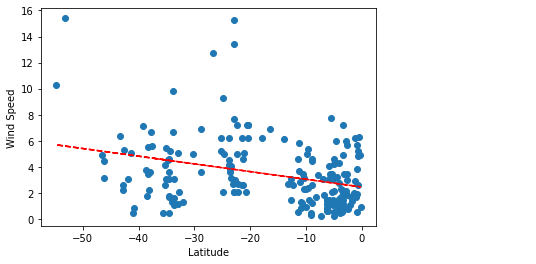

In [23]:
swl_slope, swl_int, swl_r, swl_p, swl_std_err = stats.linregress(south_cities["Lat"], south_cities["Wind Speed"])
swl_fit = swl_slope * south_cities["Lat"] + swl_int
plt.scatter(south_cities["Lat"],south_cities["Wind Speed"])
plt.plot(south_cities["Lat"],swl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {swl_r}")
line_eq = "y = " + str(round(swl_slope,2)) + "x + " + str(round(swl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()